# Analyse pH et espèce

### Importer les librairy

In [50]:
library(tidyverse)   
library(readr)       
library(readxl)     
library(vegan)       
library(reshape2)  
library(dplyr)
library(randomForest)

### Open les datas

In [51]:
spe <- read_delim("MQU_spe.txt", delim = "\t")
env <- read_delim("MQU_env.txt", delim = "\t")
traits <- read_delim("MQU_traits.txt", delim = "\t")
loc <- read_delim("MQU_loc.txt", delim = "\t")

spe <- spe %>% 
  rename(site = `...1`)

env <- env %>%
  rename(site = `Locality code`)

loc <- loc %>%
  rename(site = `Locality code`)

New names:
• `` -> `...1`
Rows: 9 Columns: 90
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (89): Acer palmatum var. pubescens, Acer serrulatum, Ardisia quinquegona...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 9 Columns: 90
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (89): Acer palmatum var. pubescens, Acer serrulatum, Ardisia quinquegona...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Locality code
dbl (2): Elevation, pH

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Spe

### Merge les espèces et les données environmentales

In [52]:
df_merged_trait <- spe %>% left_join(env, by="site")
View(df_merged_trait)

site,Acer palmatum var. pubescens,Acer serrulatum,Ardisia quinquegona,Barthea barthei,Blastus cochinchinensis,Camellia brevistyla,Camellia tenuifolia,Castanopsis cuspidata var. carlesii,Chamaecyparis obtusa var. formosana,⋯,Ternstroemia gymnanthera,Tricalysia dubia,Trochodendron aralioides,Turpinia formosana,Vaccinium randaiense,Viburnum foetidum var. rectangulatum,Viburnum integrifolium,Viburnum taitoense,Elevation,pH
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M01,0.00,0.00,4.94,0.00,9.49,0.00,0.00,4.16,0.00,⋯,0.00,0.42,0.00,0.00,0.0,0.00,0.00,0.00,794,3.8
M02,0.00,4.45,0.48,0.00,0.49,0.00,0.00,0.00,0.00,⋯,0.00,2.48,0.00,3.03,0.0,0.00,0.00,0.00,947,4.1
M03,0.00,0.00,0.18,0.00,21.31,0.00,0.00,0.92,0.00,⋯,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,868,3.0
Q01,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.17,⋯,0.00,0.00,0.00,0.00,3.1,0.00,0.00,0.00,1343,3.5
Q02,0.00,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00,⋯,1.53,0.00,0.00,0.00,0.2,0.00,0.00,5.36,1606,3.0
Q03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.32,0.00,0.32,0.00,0.0,1.93,0.32,0.63,1571,3.4
U01,3.31,0.00,0.00,0.00,0.00,0.00,3.25,12.43,0.00,⋯,1.59,0.00,4.01,0.00,0.0,1.30,0.00,0.00,1890,2.9
U02,0.00,0.00,0.00,0.00,0.00,0.00,2.32,0.00,2.21,⋯,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2082,2.8
U03,0.00,0.00,0.00,6.83,0.00,0.00,0.00,0.00,45.63,⋯,0.36,0.00,2.28,0.00,0.0,1.18,0.00,0.00,1921,3.2


# Hierarchical clustering

Librairy to download

In [53]:
library(vegan)
library(NbClust)

Distance matrix

                                          Acer palmatum var. pubescens
Acer serrulatum                                           0.0606703018
Ardisia quinquegona                                       0.0532592140
Barthea barthei                                           0.0370836417
Blastus cochinchinensis                                   0.1611308212
Camellia brevistyla                                       0.2394850582
Camellia tenuifolia                                       0.2222979911
Castanopsis cuspidata var. carlesii                       0.0212525823
Chamaecyparis obtusa var. formosana                       0.3119316029
Cinnamomum kanehirae                                      0.1486185066
Cinnamomum subavenium                                     0.2165593432
Cleyera japonica var. longicarpa                          0.0408462753
Cleyera japonica var. taipinensis                         0.0267731288
Cryptocarya chinensis                                     0.0792081624
Cyclob

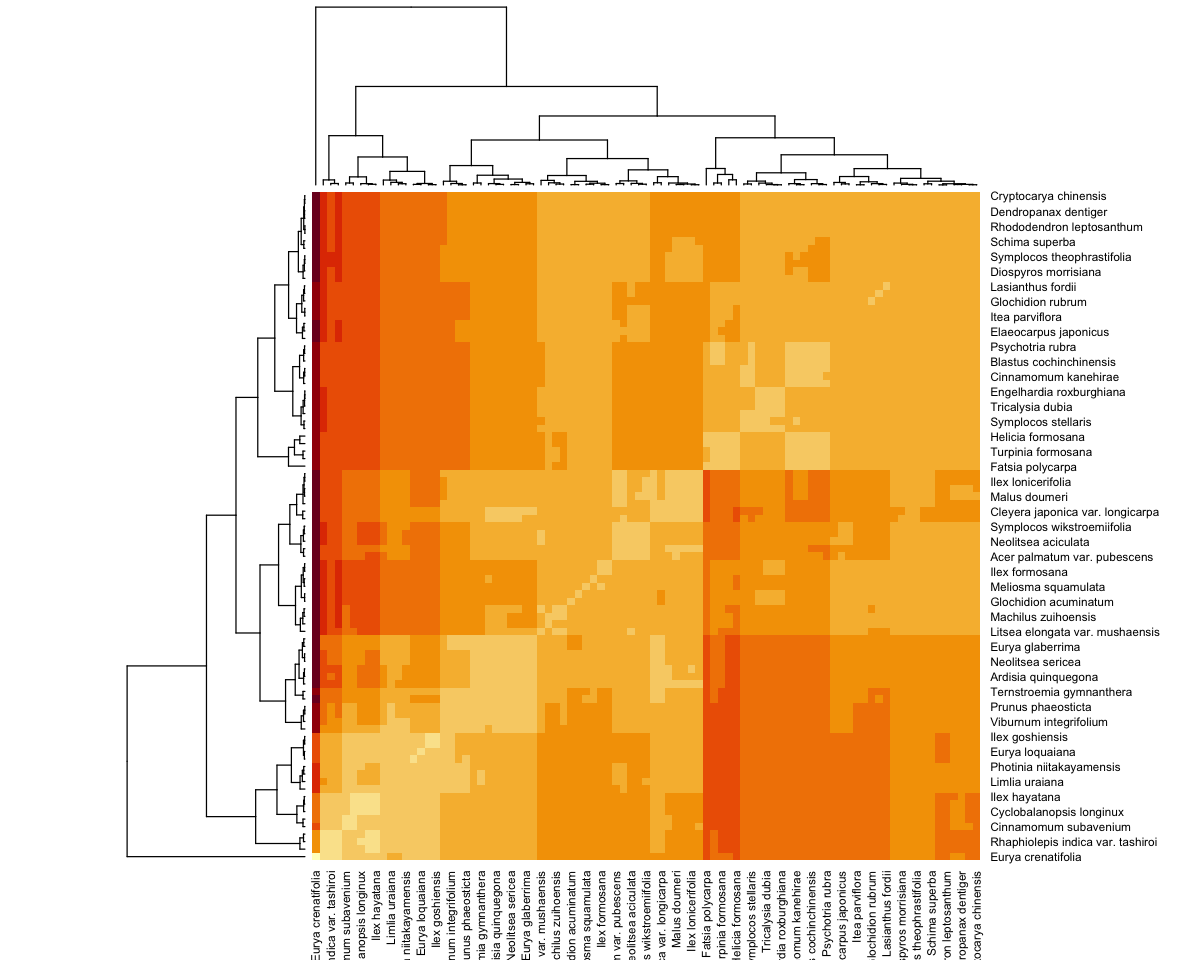

In [55]:
# Create distance matrix from normalized traits
# First, prepare the traits data (remove non-numeric columns if any)
traits_numeric <- traits %>% 
  column_to_rownames(var = colnames(traits)[1]) %>%  # Set first column as row names
  as.data.frame()

# Normalize the traits
traits_norm <- decostand(traits_numeric, "normalize")

# Calculate the distance matrix from normalized traits
distance_mat <- vegdist(traits_norm, "euc")  # Euclidean distance of normalized traits
distance_mat

options(repr.plot.width = 10, repr.plot.height = 8)
heatmap(as.matrix(distance_mat))

## Single linkage

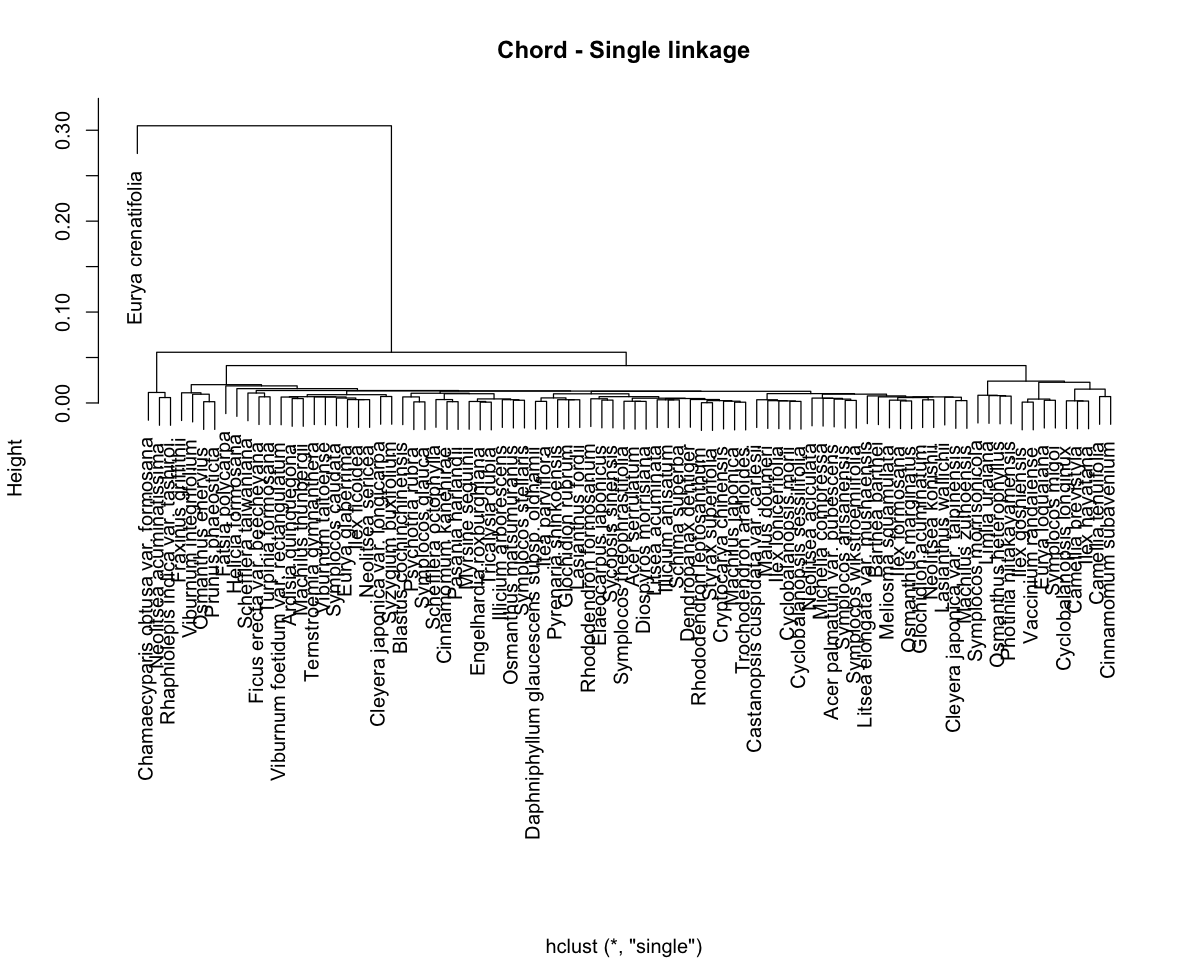

In [56]:
# Compute single linkage agglomerative clustering
spe.ch.single <- hclust(distance_mat, method = "single")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.single, main = "Chord - Single linkage", xlab="")

Cophenetic distance

In [57]:
# Compute the cophenetic distance matrix from the dendrogram obtained with single linkage clustering
spe.ch.single.coph <- cophenetic(spe.ch.single)

# Compute the cophenetic correlation between the original dissimilarities and the dendrogram
cor(distance_mat, spe.ch.single.coph)

[1] 0.7058662

Shephard diagram

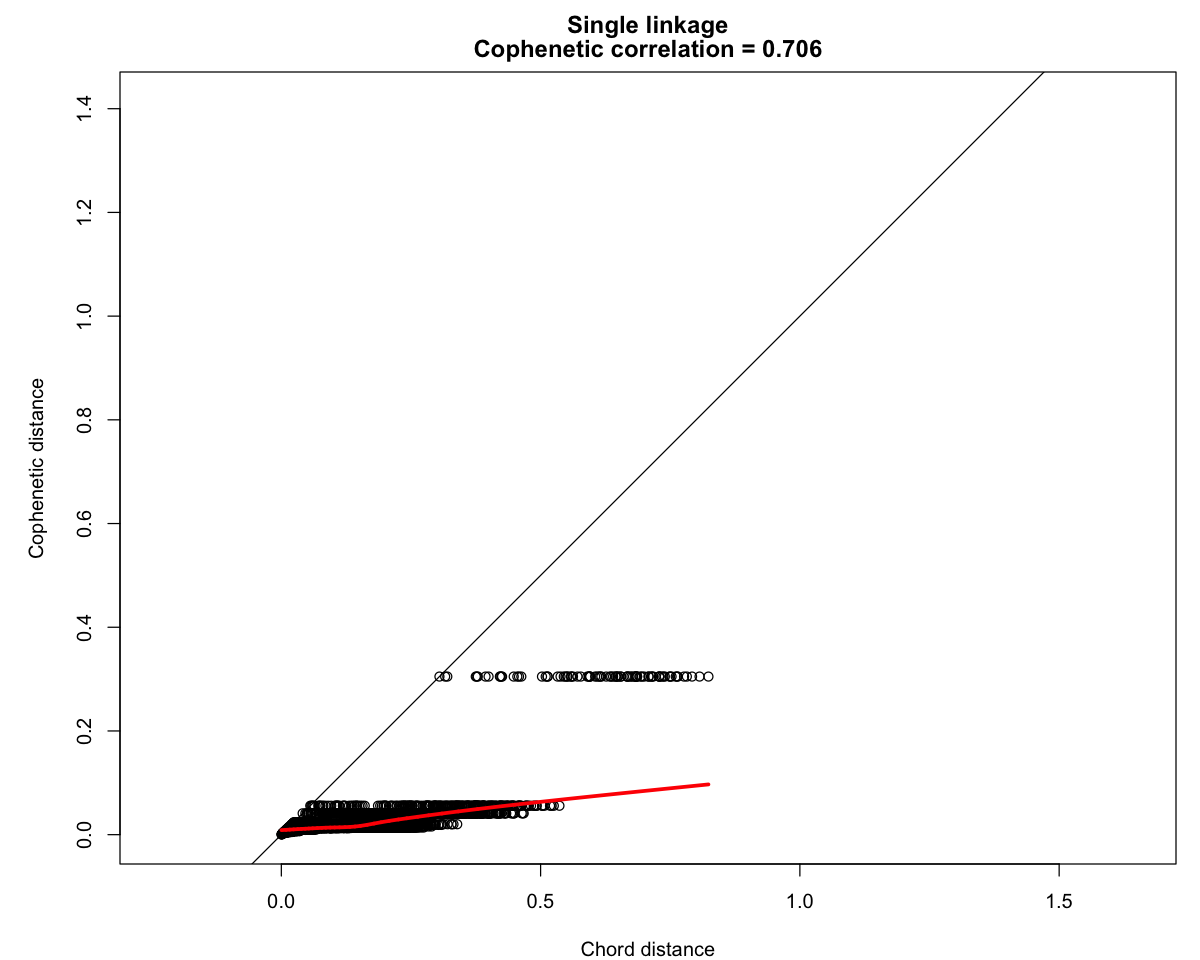

In [58]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(distance_mat, spe.ch.single.coph, #initial chord distance against cophenetic distance from single linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Single linkage", paste("Cophenetic correlation =", round(cor(distance_mat, spe.ch.single.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(distance_mat, spe.ch.single.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

Optimal number of cluster

In [85]:
Nb.single <- NbClust(
  traits_numeric,                # Input Spe matrix 
  diss = distance_mat,      #  Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "single",  # Clustering linkage method: single linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

Nb.single  # Displays the output from NbClust, including the suggested "optimal" number of clusters (best.nc) (here 10 clusters are suggested). 

$All.index
       2        3        4        5        6        7        8        9 
  0.1891   0.3026   0.8366   0.6208   0.4908   0.5005 149.7009 247.8289 
      10       11       12       13       14       15       16 
217.5624 338.9327 391.6595 752.5189 874.0755 800.8788 739.0707 

$Best.nc
Number_clusters     Value_Index 
        14.0000        874.0755 

$Best.partition
             Acer palmatum var. pubescens 
                                        1 
                          Acer serrulatum 
                                        2 
                      Ardisia quinquegona 
                                        3 
                          Barthea barthei 
                                        1 
                  Blastus cochinchinensis 
                                        4 
                      Camellia brevistyla 
                                        5 
                      Camellia tenuifolia 
                                        6 
      Castanopsis cuspidata var. carlesii 
                                        1 
      Chamaecyparis obtusa var. formosana 
                                        7 
                     Cinnamomum kanehirae 
                                        4 
                    Cinnamomum subavenium 
                                        6 
         Cleyera japonica var. longicarpa 
                                        3 
        Cleyera japonica var. taipinensis 
                                        1 
                    Cryptocarya chinensis 
                                        2 
                 Cyclobalanopsis longinux 
                                        5 
                    Cyclobalanopsis morii 
                                        1 
             Cyclobalanopsis sessilifolia 
                                        1 
Daphniphyllum glaucescens subsp. oldhamii 
                                        2 
                     Dendropanax dentiger 
                                        2 
                     Diospyros morrisiana 
                                        2 
                    Elaeocarpus japonicus 
                                        2 
                 Engelhardia roxburghiana 
                                        4 
                       Eurya crenatifolia 
                                        8 
                         Eurya glaberrima 
                                        3 
                          Eurya loquaiana 
                                        9 
                         Fatsia polycarpa 
                                       10 
             Ficus erecta var. beecheyana 
                                       11 
                      Fraxinus griffithii 
                                       12 
                    Glochidion acuminatum 
                                        1 
                        Glochidion rubrum 
                                        2 
                        Helicia formosana 
                                       13 
                            Ilex ficoidea 
                                        3 
                           Ilex formosana 
                                        1 
                          Ilex goshiensis 
                                        9 
                            Ilex hayatana 
                                        5 
                       Ilex lonicerifolia 
                                        1 
                        Illicium anisatum 
                                        2 
                     Illicium arborescens 
                                        4 
                          Itea parviflora 
                                        2 
                        Lasianthus fordii 
                                        2 
                     Lasianthus wallichii 
                                        1 
                           Limlia uraiana 
                                       14 
          

Plot of optimal number of cluster

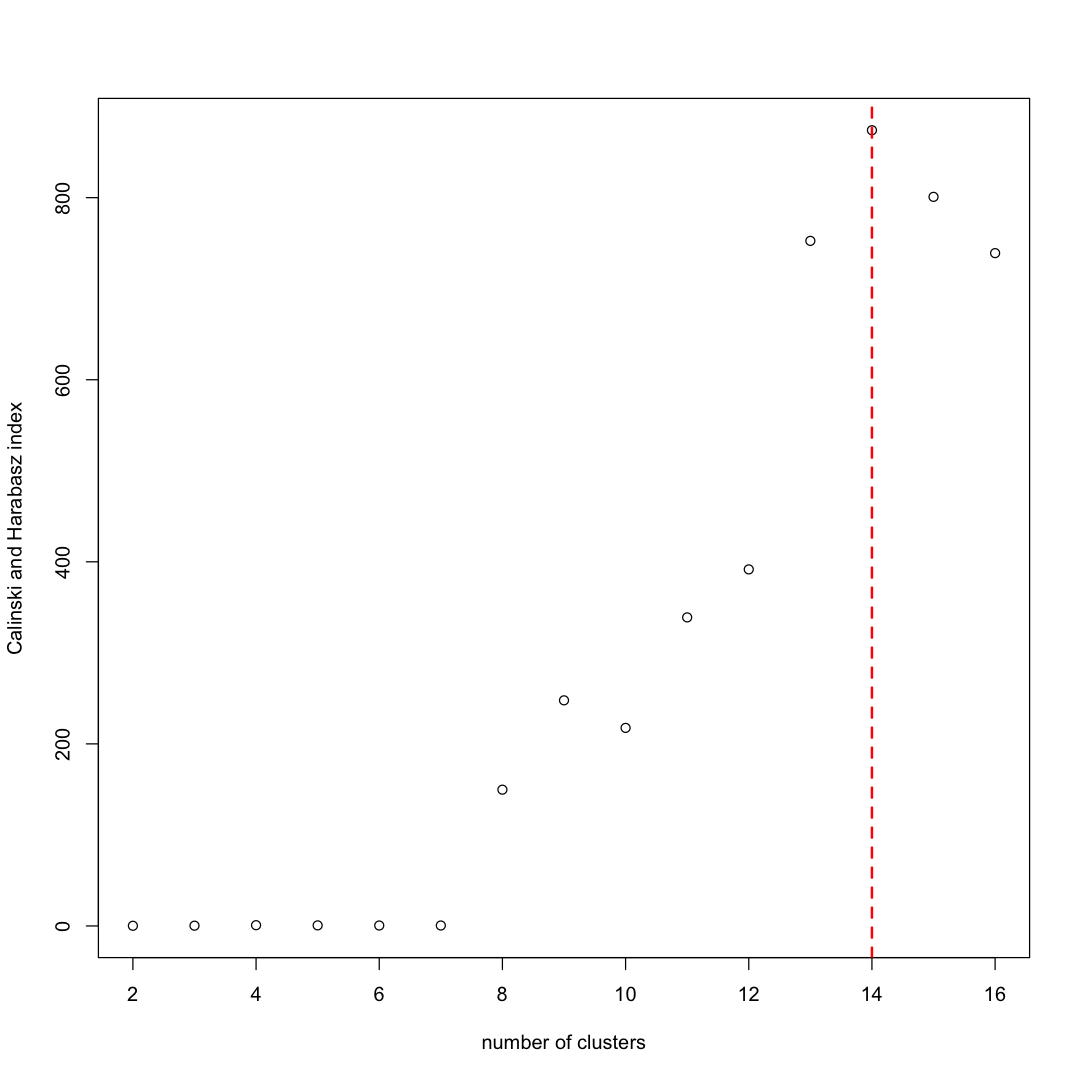

In [86]:
# Set plot size in Jupyter Notebook (9 x 9 inches)
options(repr.plot.width = 9, repr.plot.height = 9)
# Plot Index values (y) vs. number of clusters (x from 2 to 16)

plot(2:16,                                    # x : Range of cluster numbers to test (min to max)
     Nb.single$All.index,                     # Index values (y) for each number of clusters
     xlab = "number of clusters",             # Label for x-axis
     ylab = "Calinski and Harabasz index")    # Label for y-axis

abline(v = Nb.single$Best.nc[1],              # Add a vertical dashed line at optimal number of clusters
       col = "red",                           # Color of the line
       lty = 2,                               # Line type 2 = dashed
       lwd = 2)                               # Line width thicker for visibility


## Complete linkage

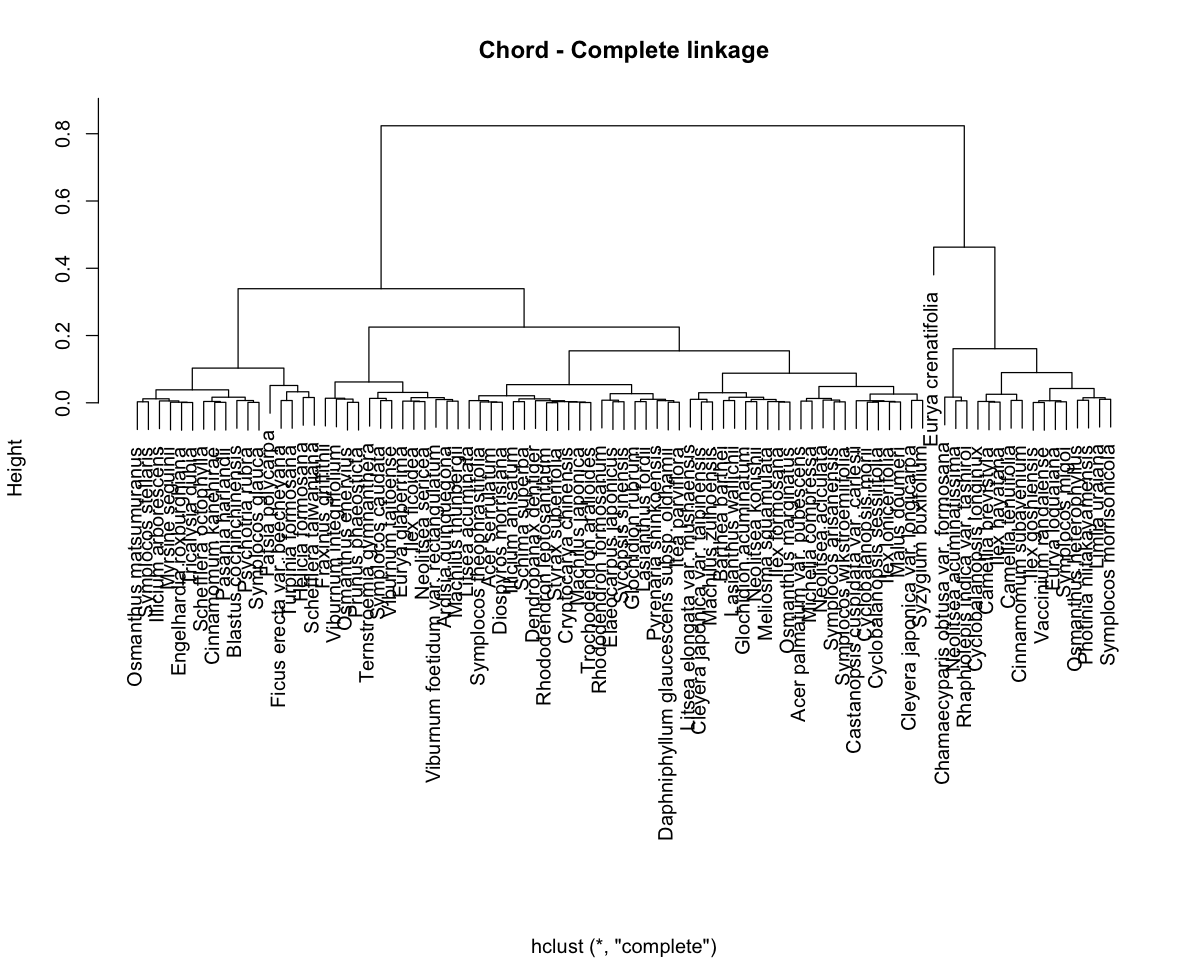

In [59]:
# Compute and plot complete-linkage agglomerative clustering
spe.ch.complete <- hclust(distance_mat, method = "complete")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.complete, main = "Chord - Complete linkage", xlab="")

Cophenetic distance

In [60]:
# Compute the cophenetic distance matrix from the dendrogram obtained with complete linkage clustering
spe.ch.comp.coph <- cophenetic(spe.ch.complete)

# Compute the cophenetic correlation for complete linkage
cor(distance_mat, spe.ch.comp.coph)

[1] 0.7465238

Shepard diagram

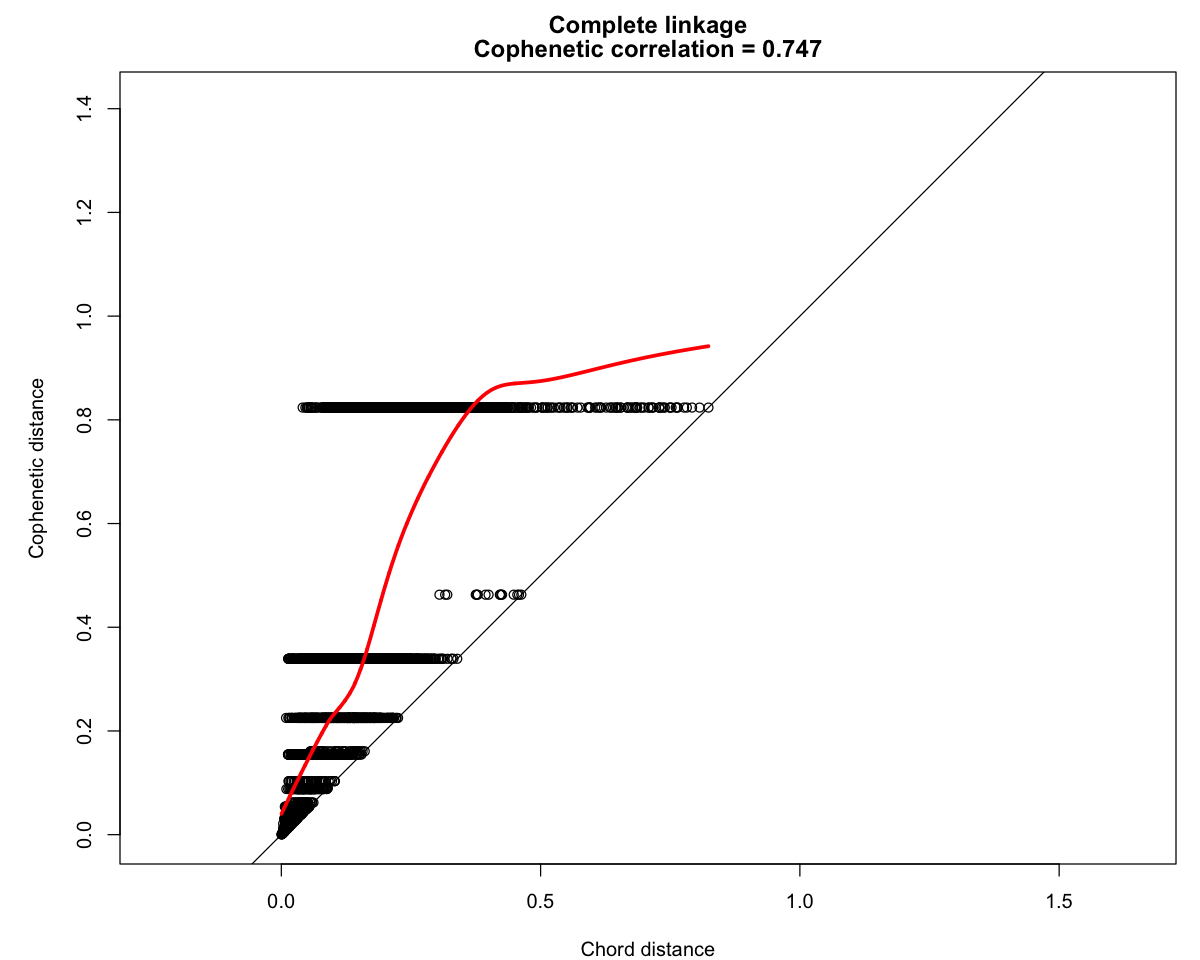

In [61]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(distance_mat, spe.ch.comp.coph, #initial chord distance against cophenetic distance from complete linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Complete linkage", paste("Cophenetic correlation =", round(cor(distance_mat, spe.ch.comp.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(distance_mat, spe.ch.comp.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

Optimal number of cluster

In [84]:
Nb.complete <- NbClust(
  traits_numeric,                # Input Spe matrix 
  diss = distance_mat,      #  Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "complete",  # Clustering linkage method: single linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

Nb.complete  # Displays the output from NbClust, including the suggested "optimal" number of clusters (best.nc) (here 10 clusters are suggested). 


$All.index
       2        3        4        5        6        7        8        9 
  2.5577   1.2685   6.2747   4.7364   3.7446   3.1250   7.6916   6.6473 
      10       11       12       13       14       15       16 
  5.8404   5.1900   4.6607 402.1886 367.3500 337.2002 334.0158 

$Best.nc
Number_clusters     Value_Index 
        13.0000        402.1886 

$Best.partition
             Acer palmatum var. pubescens 
                                        1 
                          Acer serrulatum 
                                        2 
                      Ardisia quinquegona 
                                        3 
                          Barthea barthei 
                                        4 
                  Blastus cochinchinensis 
                                        5 
                      Camellia brevistyla 
                                        6 
                      Camellia tenuifolia 
                                        6 
      Castanopsis cuspidata var. carlesii 
                                        1 
      Chamaecyparis obtusa var. formosana 
                                        7 
                     Cinnamomum kanehirae 
                                        5 
                    Cinnamomum subavenium 
                                        6 
         Cleyera japonica var. longicarpa 
                                        1 
        Cleyera japonica var. taipinensis 
                                        4 
                    Cryptocarya chinensis 
                                        2 
                 Cyclobalanopsis longinux 
                                        6 
                    Cyclobalanopsis morii 
                                        1 
             Cyclobalanopsis sessilifolia 
                                        1 
Daphniphyllum glaucescens subsp. oldhamii 
                                        8 
                     Dendropanax dentiger 
                                        2 
                     Diospyros morrisiana 
                                        2 
                    Elaeocarpus japonicus 
                                        8 
                 Engelhardia roxburghiana 
                                        5 
                       Eurya crenatifolia 
                                        9 
                         Eurya glaberrima 
                                        3 
                          Eurya loquaiana 
                                       10 
                         Fatsia polycarpa 
                                       11 
             Ficus erecta var. beecheyana 
                                       12 
                      Fraxinus griffithii 
                                       13 
                    Glochidion acuminatum 
                                        4 
                        Glochidion rubrum 
                                        8 
                        Helicia formosana 
                                       12 
                            Ilex ficoidea 
                                        3 
                           Ilex formosana 
                                        4 
                          Ilex goshiensis 
                                       10 
                            Ilex hayatana 
                                        6 
                       Ilex lonicerifolia 
                                        1 
                        Illicium anisatum 
                                        2 
                     Illicium arborescens 
                                        5 
                          Itea parviflora 
                                        8 
                        Lasianthus fordii 
                                        8 
                     Lasianthus wallichii 
                                        4 
                           Limlia uraiana 
                                       10 
          

Plot of optimal number of cluster

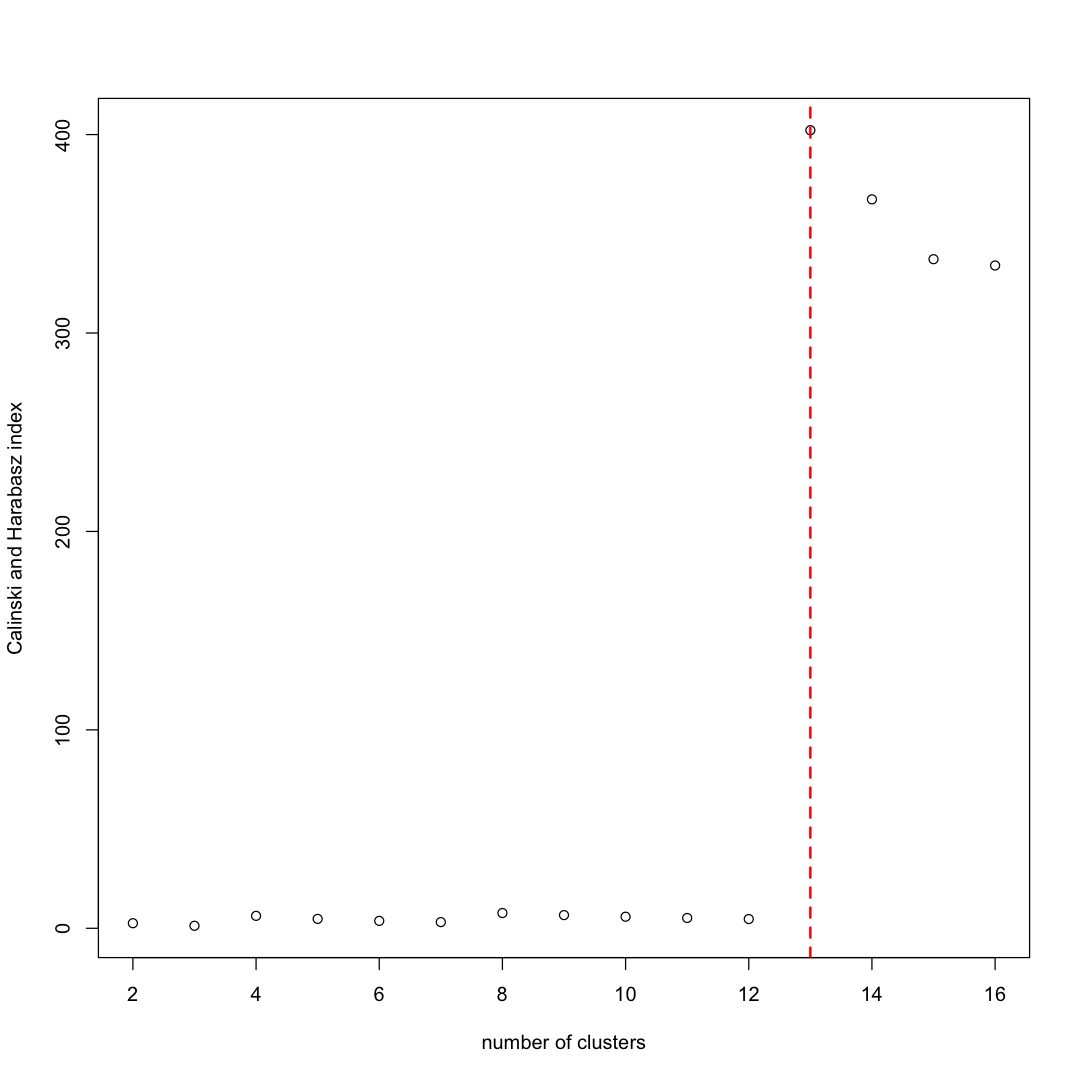

In [87]:
# Set plot size in Jupyter Notebook (9 x 9 inches)
options(repr.plot.width = 9, repr.plot.height = 9)
# Plot Index values (y) vs. number of clusters (x from 2 to 16)

plot(2:16,                                    # x : Range of cluster numbers to test (min to max)
     Nb.complete$All.index,                     # Index values (y) for each number of clusters
     xlab = "number of clusters",             # Label for x-axis
     ylab = "Calinski and Harabasz index")    # Label for y-axis

abline(v = Nb.complete$Best.nc[1],              # Add a vertical dashed line at optimal number of clusters
       col = "red",                           # Color of the line
       lty = 2,                               # Line type 2 = dashed
       lwd = 2)                               # Line width thicker for visibility


## Centroid

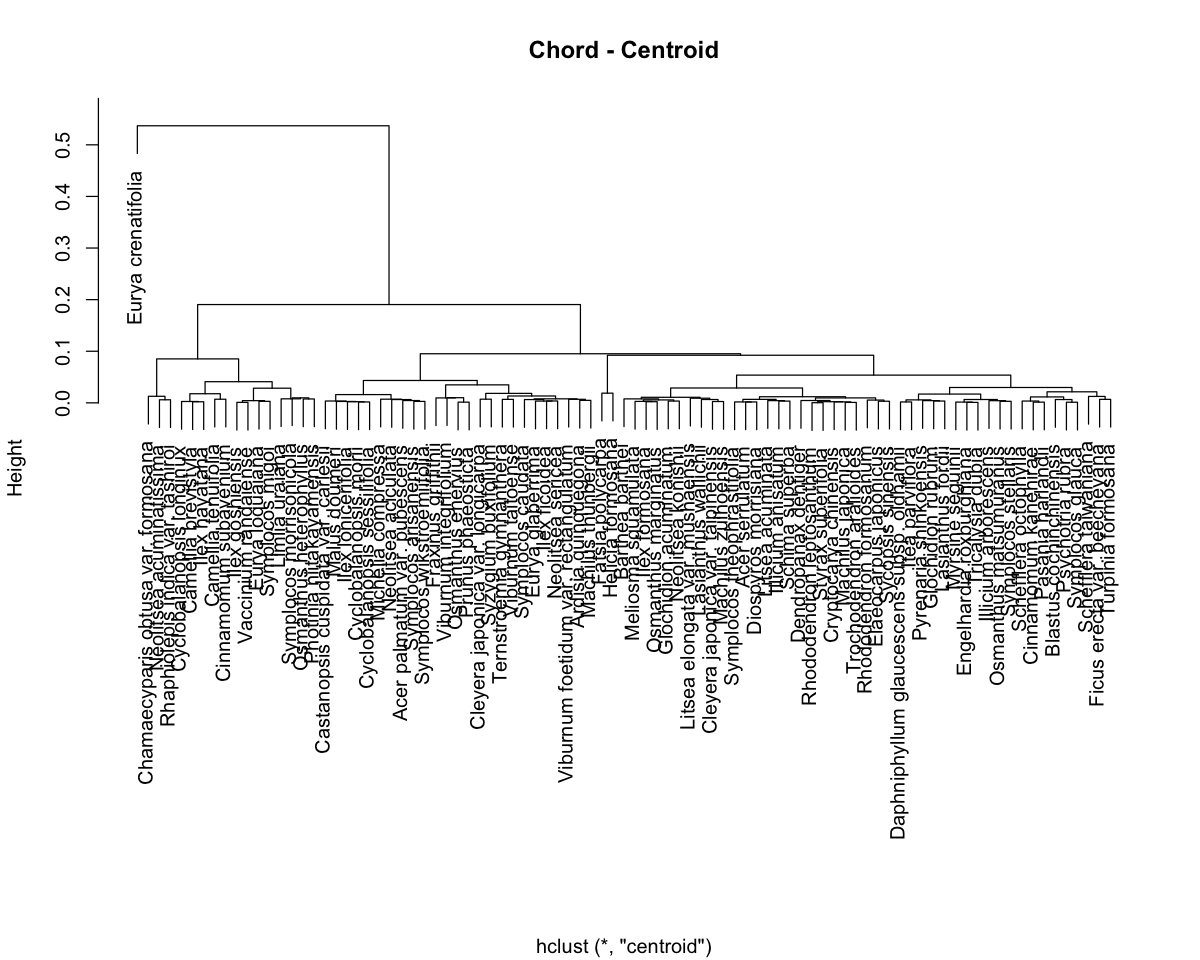

In [62]:
# Compute and plot UPGMC agglomerative clustering
spe.ch.centroid <- hclust(distance_mat, method = "centroid")

# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.centroid, main = "Chord - Centroid", xlab="")

Cophenetic distance

In [63]:
# Compute the cophenetic distance matrix from the dendrogram obtained with complete linkage clustering
spe.ch.centroid.coph <- cophenetic(spe.ch.centroid)

# Compute the cophenetic correlation for complete linkage
cor(distance_mat, spe.ch.centroid.coph)

[1] 0.845396

Shephard distance

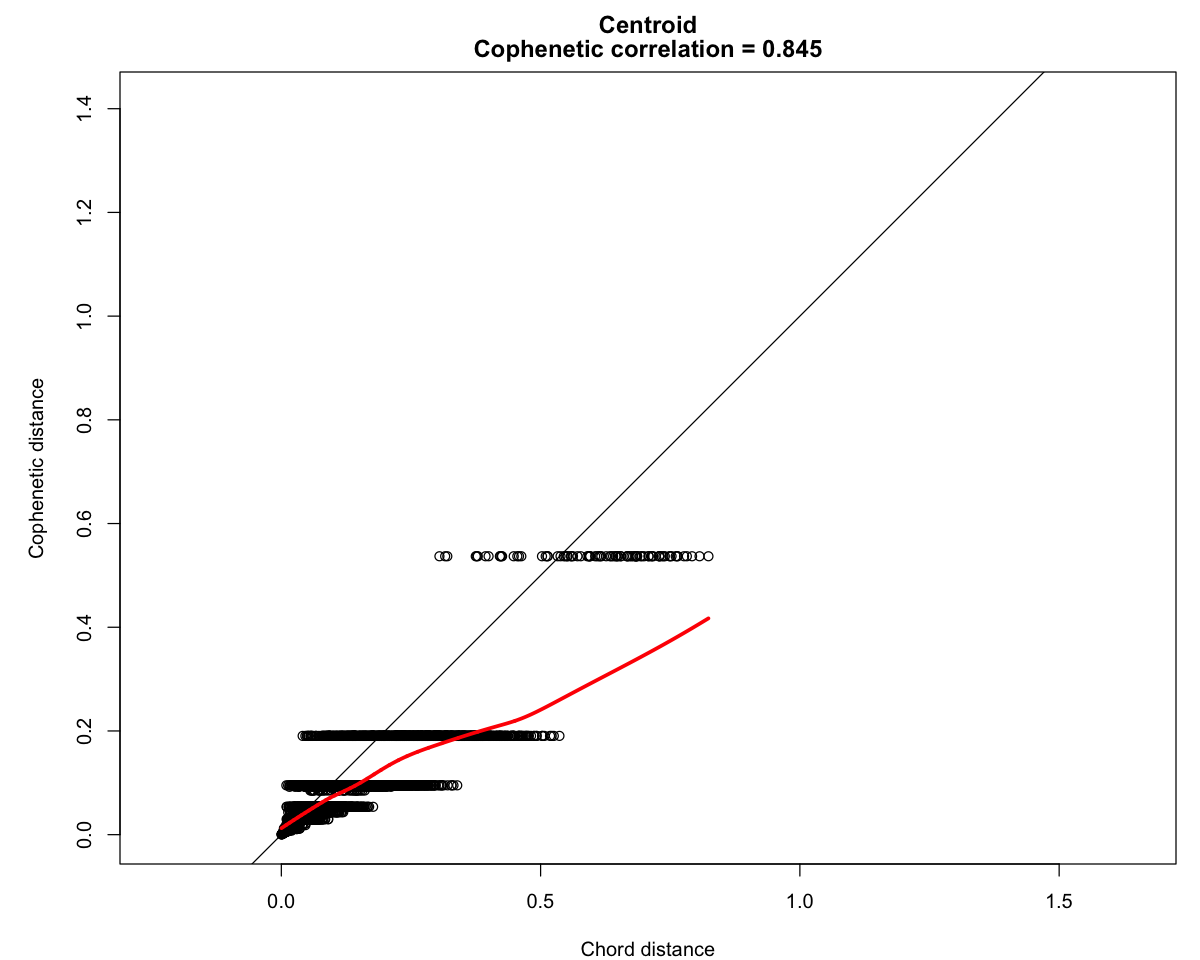

In [64]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(distance_mat, spe.ch.centroid.coph, #initial chord distance against cophenetic distance from single linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Centroid", paste("Cophenetic correlation =", round(cor(distance_mat, spe.ch.centroid.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(distance_mat, spe.ch.centroid.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

Optimal number of cluster

In [81]:
Nb.centroid <- NbClust(
  traits_numeric,                # Input Spe matrix 
  diss = distance_mat,      #  Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "centroid",  # Clustering linkage method: centroid linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

Nb.centroid  # Displays the output from NbClust, including the suggested "optimal" number of clusters (best.nc) (here 10 clusters are suggested). 

$All.index
       2        3        4        5        6        7        8        9 
  0.1891   1.2685   2.3073  43.6329  34.4948  29.7449  25.2198  21.7957 
      10       11       12       13       14       15       16 
 19.1334  17.5876  15.8313  14.3255  13.2246 886.3574 818.7382 

$Best.nc
Number_clusters     Value_Index 
        15.0000        886.3574 

$Best.partition
             Acer palmatum var. pubescens 
                                        1 
                          Acer serrulatum 
                                        2 
                      Ardisia quinquegona 
                                        3 
                          Barthea barthei 
                                        4 
                  Blastus cochinchinensis 
                                        5 
                      Camellia brevistyla 
                                        6 
                      Camellia tenuifolia 
                                        6 
      Castanopsis cuspidata var. carlesii 
                                        1 
      Chamaecyparis obtusa var. formosana 
                                        7 
                     Cinnamomum kanehirae 
                                        5 
                    Cinnamomum subavenium 
                                        6 
         Cleyera japonica var. longicarpa 
                                        3 
        Cleyera japonica var. taipinensis 
                                        4 
                    Cryptocarya chinensis 
                                        2 
                 Cyclobalanopsis longinux 
                                        6 
                    Cyclobalanopsis morii 
                                        1 
             Cyclobalanopsis sessilifolia 
                                        1 
Daphniphyllum glaucescens subsp. oldhamii 
                                        8 
                     Dendropanax dentiger 
                                        2 
                     Diospyros morrisiana 
                                        2 
                    Elaeocarpus japonicus 
                                        2 
                 Engelhardia roxburghiana 
                                        8 
                       Eurya crenatifolia 
                                        9 
                         Eurya glaberrima 
                                        3 
                          Eurya loquaiana 
                                       10 
                         Fatsia polycarpa 
                                       11 
             Ficus erecta var. beecheyana 
                                       12 
                      Fraxinus griffithii 
                                       13 
                    Glochidion acuminatum 
                                        4 
                        Glochidion rubrum 
                                        8 
                        Helicia formosana 
                                       14 
                            Ilex ficoidea 
                                        3 
                           Ilex formosana 
                                        4 
                          Ilex goshiensis 
                                       10 
                            Ilex hayatana 
                                        6 
                       Ilex lonicerifolia 
                                        1 
                        Illicium anisatum 
                                        2 
                     Illicium arborescens 
                                        8 
                          Itea parviflora 
                                        8 
                        Lasianthus fordii 
                                        8 
                     Lasianthus wallichii 
                                        4 
                           Limlia uraiana 
                                       15 
          

Plot of optimal number of cluster

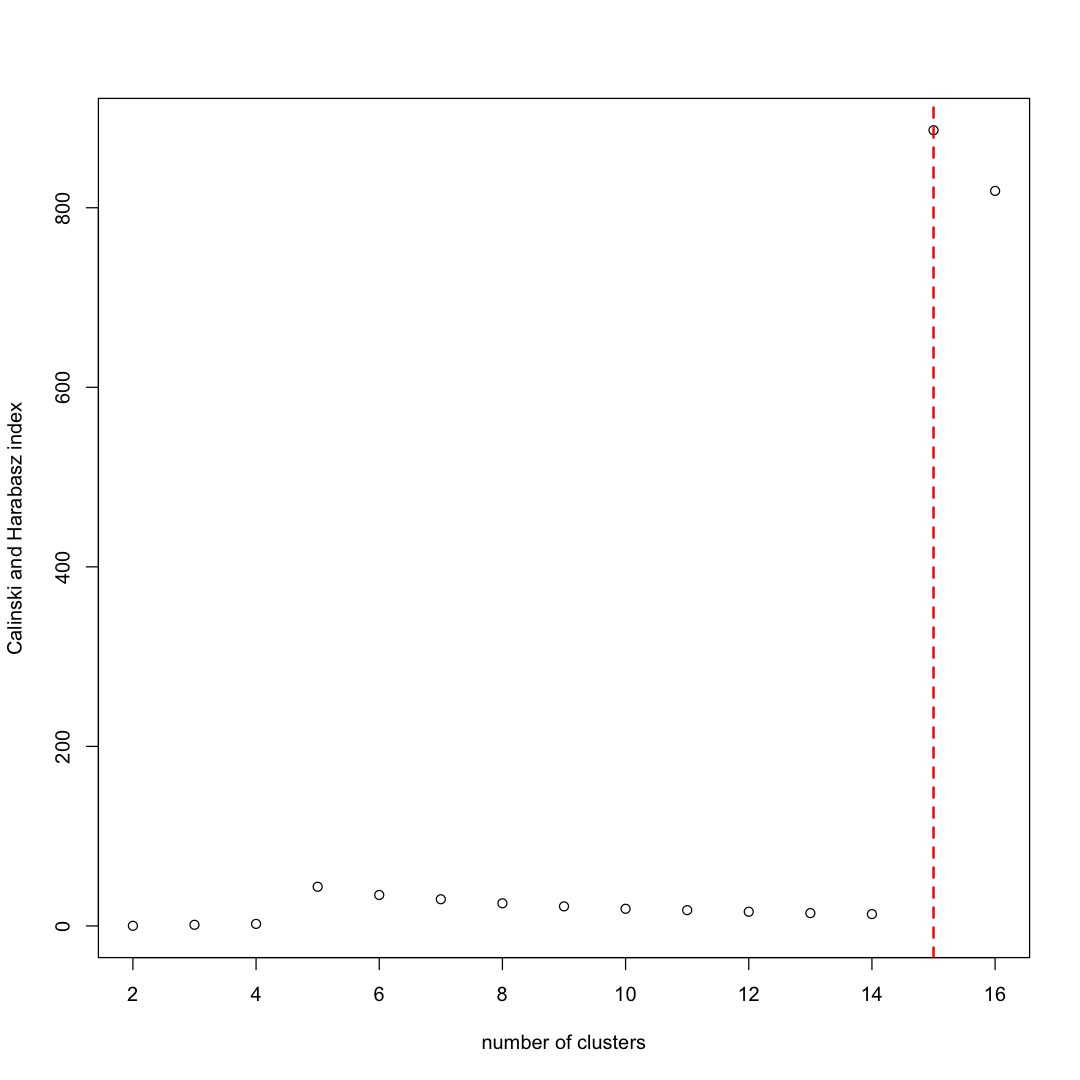

In [88]:
# Set plot size in Jupyter Notebook (9 x 9 inches)
options(repr.plot.width = 9, repr.plot.height = 9)
# Plot Index values (y) vs. number of clusters (x from 2 to 16)

plot(2:16,                                    # x : Range of cluster numbers to test (min to max)
     Nb.centroid$All.index,                     # Index values (y) for each number of clusters
     xlab = "number of clusters",             # Label for x-axis
     ylab = "Calinski and Harabasz index")    # Label for y-axis

abline(v = Nb.centroid$Best.nc[1],              # Add a vertical dashed line at optimal number of clusters
       col = "red",                           # Color of the line
       lty = 2,                               # Line type 2 = dashed
       lwd = 2)                               # Line width thicker for visibility
